In [19]:
#FIGURE A 

In [20]:
#数据合并——数据清洗
#引入需要的库
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# 读取四个CSV文件
df1 = pd.read_csv('北太平庄二手房.csv')
df2 = pd.read_csv('万柳二手房.csv')
df3 = pd.read_csv('世纪城二手房.csv')
df4 = pd.read_csv('苏州桥二手房.csv')

# 查看原始列名
print("原始列名")
print(df3.columns)

# 重命名列，将列名转换为标准格式
df3.columns = df3.columns.str.strip()  # 去掉首尾空格
df3.columns = df3.columns.str.replace('单价（万/㎡）', '单价（元/㎡）')  # 确保列名统一

# 查看重命名后的列名
print("清理后的列名：")
print(df3.columns)

# 确保单价列为字符串
df3['单价（元/㎡）'] = df3['单价（元/㎡）'].astype(str).fillna('0')  # 转换为字符串并填充 NaN

# 创建一个函数清理数据
def clean_price_column(column):
    cleaned = column.str.extract(r'(\d+\.?\d*)')  # 提取数字部分
    return cleaned.astype(float)  # 转换为浮点数

# 清理单价列
df3['单价（元/㎡）'] = clean_price_column(df3['单价（元/㎡）'])

# 检查清理后的数据
print("清理后的数据：")
print(df3.head())

# 保存清理后的数据
df3.to_csv("世纪城二手房.csv", index=False)  # 确保文件名不同


原始列名
Index(['名称', '总价（万）', '单价（元/㎡）', '面积（㎡）'], dtype='object')
清理后的列名：
Index(['名称', '总价（万）', '单价（元/㎡）', '面积（㎡）'], dtype='object')
清理后的数据：
                              名称   总价（万）   单价（元/㎡）   面积（㎡）
0      世纪城春荫园南北通透四居室稳定出售,近地铁靠近金源  2100.0  100478.0  209.00
1                   4室2厅世纪城三期晴波园  1820.0  110303.0  165.00
2  世纪城 眼镜4居 南北向通透 装修好 拎包入住业主诚意出售  2600.0  124294.0  209.18
3                   3室2厅世纪城三期时雨园  1350.0   81325.0  166.00
4                    5室2厅鲁艺上河村三区  5300.0  183346.0  289.07


In [37]:
#数据合并——合并二手房数据
# 读取四个CSV文件
df1 = pd.read_csv('北太平庄二手房.csv')
df2 = pd.read_csv('万柳二手房.csv')
df3 = pd.read_csv('世纪城二手房.csv')
df4 = pd.read_csv('苏州桥二手房.csv')

# 重命名列以确保列名一致
columns_to_rename = {
    '名称': '名称',
    '总价（万）': '总价（万）',
    '单价（元/㎡）': '单价（元/㎡）',
    '面积（㎡）': '面积（㎡）'
}

# 统一重命名列
df1.rename(columns=columns_to_rename, inplace=True)
df2.rename(columns=columns_to_rename, inplace=True)
df3.rename(columns=columns_to_rename, inplace=True)
df4.rename(columns=columns_to_rename, inplace=True)

# 选择需要的列
df1_selected = df1[['名称', '总价（万）', '单价（元/㎡）', '面积（㎡）']]
df2_selected = df2[['名称', '总价（万）', '单价（元/㎡）', '面积（㎡）']]
df3_selected = df3[['名称', '总价（万）', '单价（元/㎡）', '面积（㎡）']]
df4_selected = df4[['名称', '总价（万）', '单价（元/㎡）', '面积（㎡）']]

# 合并数据
merged_df = pd.concat([df1_selected, df2_selected, df3_selected, df4_selected], ignore_index=True)

# 查看合并后的数据
print("合并后的数据：")
print(merged_df.head())

# 保存合并后的数据
merged_df.to_csv("合并二手房数据.csv", index=False)  # 保存为新的CSV文件



合并后的数据：
                              名称   总价（万）   单价（元/㎡）   面积（㎡）
0      世纪城春荫园南北通透四居室稳定出售,近地铁靠近金源  2100.0  100478.0  209.00
1                   4室2厅世纪城三期晴波园  1820.0  110303.0  165.00
2  世纪城 眼镜4居 南北向通透 装修好 拎包入住业主诚意出售  2600.0  124294.0  209.18
3                   3室2厅世纪城三期时雨园  1350.0   81325.0  166.00
4                    5室2厅鲁艺上河村三区  5300.0  183346.0  289.07


In [38]:
#对租房数据重复操作
# 读取四个CSV文件
df1 = pd.read_csv('北太平庄租房.csv')
df2 = pd.read_csv('万柳租房.csv')
df3 = pd.read_csv('世纪城租房.csv')
df4 = pd.read_csv('苏州桥租房.csv')

# 查看原始列名
print("原始列名")
print(df3.columns)

# 重命名列，将列名转换为标准格式
df3.columns = df3.columns.str.strip()  # 去掉首尾空格
df3.columns = df3.columns.str.replace('面积', '面积（㎡）')  # 确保列名统一

# 查看重命名后的列名
print("清理后的列名：")
print(df3.columns)

# 确保单价列为字符串
df3['面积（㎡）'] = df3['面积（㎡）'].astype(str).fillna('0')  # 转换为字符串并填充 NaN

# 创建一个函数清理数据
def clean_price_column(column):
    cleaned = column.str.extract(r'(\d+\.?\d*)')  # 提取数字部分
    return cleaned.astype(float)  # 转换为浮点数

# 清理单价列
df3['面积（㎡）'] = clean_price_column(df3['面积（㎡）'])

# 检查清理后的数据
print("清理后的数据：")
print(df3.head())

# 保存清理后的数据
df3.to_csv("世纪城租房.csv", index=False)  # 确保文件名不同


原始列名
Index(['房屋名称', '租金', '房间数', '面积'], dtype='object')
清理后的列名：
Index(['房屋名称', '租金', '房间数', '面积（㎡）'], dtype='object')
清理后的数据：
                         房屋名称     租金   房间数  面积（㎡）
0  远大园三区 4室2卫2厅 204平简装修 22000  22000  4室2厅  204.0
1   世纪城三期垂虹园 4室2厅2卫 主卧朝南 品质小区  20000  4室2厅  207.0
2                2室2厅世纪城三期垂虹园  12500  2室2厅  122.0
3                4室2厅世纪城三期春荫园  29000  4室2厅  213.0
4            整租·远大园六区 4室2厅 东南  16200  4室2厅  172.0


In [47]:
#合并租房数据
# 读取四个CSV文件
df1 = pd.read_csv('北太平庄租房.csv')
df2 = pd.read_csv('万柳租房.csv')
df3 = pd.read_csv('世纪城租房.csv')
df4 = pd.read_csv('苏州桥租房.csv')

# 重命名列以确保列名一致
columns_to_rename = {
    '名称': '名称',
    '租金（元/月）': '租金（元/月）',
    '面积（㎡）': '面积（㎡）'
}

# 统一重命名列
df1.rename(columns=columns_to_rename, inplace=True)
df2.rename(columns=columns_to_rename, inplace=True)
df3.rename(columns=columns_to_rename, inplace=True)
df4.rename(columns=columns_to_rename, inplace=True)

# 选择需要的列
df1_selected = df1[['名称', '租金（元/月）', '面积（㎡）']]
df2_selected = df2[['名称', '租金（元/月）', '面积（㎡）']]
df3_selected = df3[['名称', '租金（元/月）', '面积（㎡）']]
df4_selected = df4[['名称', '租金（元/月）', '面积（㎡）']]

# 合并数据
merged_df = pd.concat([df1_selected, df2_selected, df3_selected, df4_selected], ignore_index=True)

# 查看合并后的数据
print("合并后的数据：")
print(merged_df.head())

# 保存合并后的数据
merged_df.to_csv("合并租房数据.csv", index=False)  # 保存为新的CSV文件


合并后的数据：
                           名称  租金（元/月）  面积（㎡）
0        北师大东门北太平庄桥南三居东向大次卧出租   2650.0   20.0
1  小西天北师大 枫蓝国际 北京邮电大学家属院4号楼一层   6300.0   60.0
2        师大东门北太平庄桥南师大家属院大次卧出租   2550.0   20.0
3  杏坛路 蓟门桥 北三环 北师大北邮 交科院8号楼精装   7400.0   53.0
4            整租·小西天·交科院·2室·1厅   7200.0   65.0


In [50]:
#描述性统计
import pandas as pd

# 读取合并后的租房数据
data = pd.read_csv('合并租房数据.csv')

# 输出数据的基本信息
print("数据概述：")
print(data.info())

# 输出数据的描述统计
print("\n描述性统计：")
description = data.describe(include='all')  # 包括所有类型的描述性统计
print(description)

# 选择数值型列以进行离群值检测
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# 检查是否存在离群值
for column in numeric_columns:
    # 通过 IQR 方法来识别离群值
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # 确定离群值的范围
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 找到离群值
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # 输出离群值
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")


数据概述：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2989 entries, 0 to 2988
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   名称       2989 non-null   object 
 1   租金（元/月）  2989 non-null   float64
 2   面积（㎡）    2989 non-null   float64
dtypes: float64(2), object(1)
memory usage: 70.2+ KB
None

描述性统计：
                名称        租金（元/月）        面积（㎡）
count         2989    2989.000000  2989.000000
unique         573            NaN          NaN
top     4室2厅万泉新新家园            NaN          NaN
freq           100            NaN          NaN
mean           NaN   23829.760455   150.071261
std            NaN   24123.432192    93.769762
min            NaN    1700.000000     8.000000
25%            NaN   10200.000000    83.000000
50%            NaN   16000.000000   136.000000
75%            NaN   26000.000000   180.000000
max            NaN  160000.000000  1501.000000

列 '租金（元/月）' 的离群值：
243      58000.0
244      80000.0
245     138000.

数据概述——租房数据
数据集共有2989条记录，包含3个列。
名称列（对象类型）有573个独特的值，而租金和面积列均为数值类型（float64）。
数据中没有缺失值（Non-Null Count 均为2989）。
描述性统计
租金（元/月）:

平均租金为23829.76元，标准差为24123.43元。
最低租金为1700元，最高租金为160000元。
租金分布明显偏向于高值，因为75%的租金在26000元以下，而有不少租金超过8万或更高。
面积（㎡）:

平均面积为150.07平方米，标准差为93.77平方米。
最小面积为8平方米，最大面积为1501平方米。
面积的中位数为136平方米，75%的数据会在180平方米以下。
离群值
租金（元/月）: 有302个离群值，例子包括58000元、80000元和138000元等。它们的值明显高于大多数数据点。
面积（㎡）: 有153个离群值，例如361㎡、367㎡和468㎡等，这些值也显著高于其他记录。

In [51]:
import pandas as pd

# 读取合并后的租房数据
data = pd.read_csv('合并二手房数据.csv')

# 输出数据的基本信息
print("数据概述：")
print(data.info())

# 输出数据的描述统计
print("\n描述性统计：")
description = data.describe(include='all')  # 包括所有类型的描述性统计
print(description)

# 选择数值型列以进行离群值检测
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# 检查是否存在离群值
for column in numeric_columns:
    # 通过 IQR 方法来识别离群值
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # 确定离群值的范围
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 找到离群值
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # 输出离群值
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")


数据概述：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   名称       3907 non-null   object 
 1   总价（万）    3907 non-null   float64
 2   单价（元/㎡）  3907 non-null   float64
 3   面积（㎡）    3907 non-null   float64
dtypes: float64(3), object(1)
memory usage: 122.2+ KB
None

描述性统计：
                    名称         总价（万）        单价（元/㎡）        面积（㎡）
count             3907   3907.000000    3907.000000  3907.000000
unique             728           NaN            NaN          NaN
top     3室2厅世纪城二期远大园五区           NaN            NaN          NaN
freq               168           NaN            NaN          NaN
mean               NaN   2201.969926  124186.824418   165.267789
std                NaN   1665.077932   37793.961737    70.069719
min                NaN    240.000000   44927.000000    26.800000
25%                NaN   1350.000000  101980.000000   125.000000
50%     

数据概述——二手房数据
数据集大小: 总共有3907条记录。
列信息:
名称: 该列包含字符串类型（对象），共有728个独特的值。
总价（万）: 数值型（float64），表示房产的总价格。
单价（元/㎡）: 数值型（float64），表示房产每平方米的价格。
面积（㎡）: 数值型（float64），表示房产的面积（以平方米为单位）。
内存使用: 约122.2 KB。
描述性统计
总价（万）:

平均总价为2201.97万元，标准差为1665.08万元。
最低总价为24万元，最高总价为12500万元，显示出数据集中的明显高价物业。
单价（元/㎡）:

平均单价为124186.82元/㎡，标准差为37793.96元/㎡。
最低单价为44927元/㎡，最高单价为312685元/㎡，说明该区域的房价波动较大。
面积（㎡）:

平均面积为165.27㎡，标准差为70.07㎡。
面积数据的最低值为26.8㎡，最高值为551㎡，整体上面积也显示出很大的波动性。
离群值分析
总价（万）:

发现了375个离群值，比如5300万元、4000万元。较高的离群值可能是市场上高端房产的结果。
单价（元/㎡）:

有250个离群值，最高到214322元/㎡。这表明在某些区域有非常高的售价，可能是因为地段或房屋类型所致。
面积（㎡）:

246个离群值，如300.13㎡和380.86㎡等。这些离群值表明某些房产可能远大于一般范围。

In [65]:
#关键信息
#每个区域二手房的单价——
df1 = pd.read_csv('北太平庄二手房.csv') 
df1['单价'] = df1['总价（万）'] / df1['面积（㎡）']
average_price = df1['单价'].mean()
print(f'北太平庄二手房单价: {average_price}')

df2 = pd.read_csv('世纪城二手房.csv') 
df2['单价'] = df2['总价（万）'] / df2['面积（㎡）']
average_price = df2['单价'].mean()
print(f'世纪城二手房单价: {average_price}')

df3 = pd.read_csv('万柳二手房.csv') 
df3['单价'] = df3['总价（万）'] / df['面积（㎡）']
average_price = df3['单价'].mean()
print(f'万柳二手房单价: {average_price}')

df4 = pd.read_csv('苏州桥二手房.csv') 
df4['单价'] = df4['总价（万）'] / df4['面积（㎡）']
average_price = df4['单价'].mean()
print(f'苏州桥二手房单价: {average_price}')

#每个区域的租房单价
df5 = pd.read_csv('北太平庄租房.csv') 
df5['单价'] = df5['租金（元/月）'] / df5['面积（㎡）']
average_price = df5['单价'].mean()
print(f'北太平庄租房单价: {average_price}')

df6 = pd.read_csv('世纪城租房.csv') 
df6['单价'] = df6['租金（元/月）'] / df6['面积（㎡）']
average_price = df6['单价'].mean()
print(f'世纪城租房单价: {average_price}')

df7 = pd.read_csv('万柳租房.csv') 
df7['单价'] = df7['租金（元/月）'] / df7['面积（㎡）']
average_price = df7['单价'].mean()
print(f'万柳租房单价: {average_price}')

df8 = pd.read_csv('苏州桥租房.csv') 
df8['单价'] = df8['租金（元/月）'] / df8['面积（㎡）']
average_price = df8['单价'].mean()
print(f'苏州桥租房单价: {average_price}')


北太平庄二手房单价: 11.376892503003841
世纪城二手房单价: 11.376892503003841
万柳二手房单价: 78.5149434486238
苏州桥二手房单价: 7.97101639120564
北太平庄租房单价: 137.5244041203927
世纪城租房单价: 119.98700142605367
万柳租房单价: 175.83497782631218
苏州桥租房单价: 137.59147853689825


In [69]:
#北太平庄的数据描述与异常值判断
import pandas as pd
data = pd.read_csv('北太平庄二手房.csv')
print("数据概述：")
print(data.info())
print("\n描述性统计：")
description = data.describe(include='all')  
print(description)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]   
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")

 
data = pd.read_csv('北太平庄租房.csv')
print("数据概述：")
print(data.info())
print("\n描述性统计：")
description = data.describe(include='all')  
print(description)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]   
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")
#北太平庄中位数房价与年租金比率
median_sh1 = df1['单价'].median()*10000#万为单位
median_rent1 = df5['单价'].median()*12
median_ptrr1 = median_sh1 / median_rent1
median_ptrr1 

数据概述：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   名称       1200 non-null   object 
 1   总价（万）    1200 non-null   float64
 2   单价（元/㎡）  1200 non-null   float64
 3   面积（㎡）    1200 non-null   float64
dtypes: float64(3), object(1)
memory usage: 37.6+ KB
None

描述性统计：
                    名称        总价（万）        单价（元/㎡）        面积（㎡）
count             1200  1200.000000    1200.000000  1200.000000
unique             238          NaN            NaN          NaN
top     3室2厅世纪城二期远大园五区          NaN            NaN          NaN
freq                84          NaN            NaN          NaN
mean               NaN  1913.304167  113768.467500   165.858575
std                NaN   826.861115   18814.676912    50.628789
min                NaN   377.000000   65860.000000    56.990000
25%                NaN  1450.000000  101120.750000   130.000000
50%               

70.67435669920143

In [73]:
#世纪城的数据描述与异常值判断
import pandas as pd
data = pd.read_csv('世纪城二手房.csv')
print("数据概述：")
print(data.info())
print("\n描述性统计：")
description = data.describe(include='all')  
print(description)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]   
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")

 
data = pd.read_csv('世纪城租房.csv')
print("数据概述：")
print(data.info())
print("\n描述性统计：")
description = data.describe(include='all')  
print(description)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]   
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")
#世纪城中位数房价与年租金比率
median_sh2 = df2['单价'].median()*10000#万为单位
median_rent2 = df6['单价'].median()*12
median_ptrr2 = median_sh2 / median_rent2
median_ptrr2 

数据概述：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   名称       1200 non-null   object 
 1   总价（万）    1200 non-null   float64
 2   单价（元/㎡）  1200 non-null   float64
 3   面积（㎡）    1200 non-null   float64
dtypes: float64(3), object(1)
memory usage: 37.6+ KB
None

描述性统计：
                    名称        总价（万）        单价（元/㎡）        面积（㎡）
count             1200  1200.000000    1200.000000  1200.000000
unique             238          NaN            NaN          NaN
top     3室2厅世纪城二期远大园五区          NaN            NaN          NaN
freq                84          NaN            NaN          NaN
mean               NaN  1913.304167  113768.467500   165.858575
std                NaN   826.861115   18814.676912    50.628789
min                NaN   377.000000   65860.000000    56.990000
25%                NaN  1450.000000  101120.750000   130.000000
50%               

81.25843910342965

In [74]:
#万柳的数据描述与异常值判断
import pandas as pd
data = pd.read_csv('万柳二手房.csv')
print("数据概述：")
print(data.info())
print("\n描述性统计：")
description = data.describe(include='all')  
print(description)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]   
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")

 
data = pd.read_csv('万柳租房.csv')
print("数据概述：")
print(data.info())
print("\n描述性统计：")
description = data.describe(include='all')  
print(description)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]   
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")
#北太平庄中位数房价与年租金比率
median_sh3 = df3['单价'].median()*10000#万为单位
median_rent3 = df7['单价'].median()*12
median_ptrr3 = median_sh3 / median_rent3
median_ptrr3 

数据概述：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   名称       1200 non-null   object 
 1   面积（㎡）    1200 non-null   float64
 2   总价（万）    1200 non-null   int64  
 3   单价（元/㎡）  1200 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 37.6+ KB
None

描述性统计：
                        名称        面积（㎡）         总价（万）        单价（元/㎡）
count                 1200  1200.000000   1200.000000    1200.000000
unique                 314          NaN           NaN            NaN
top     3室2厅万泉新新家园\n3室2厅 |          NaN           NaN            NaN
freq                    66          NaN           NaN            NaN
mean                   NaN   185.022758   3176.295833  156402.146667
std                    NaN    88.997006   2425.994370   46230.681154
min                    NaN    44.170000    379.000000   61626.000000
25%                    NaN   127

219.30025166632305

In [75]:
#苏州桥的数据描述与异常值判断
import pandas as pd
data = pd.read_csv('苏州桥二手房.csv')
print("数据概述：")
print(data.info())
print("\n描述性统计：")
description = data.describe(include='all')  
print(description)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]   
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")

 
data = pd.read_csv('苏州桥租房.csv')
print("数据概述：")
print(data.info())
print("\n描述性统计：")
description = data.describe(include='all')  
print(description)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR  
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]   
    if not outliers.empty:
        print(f"\n列 '{column}' 的离群值：")
        print(outliers[column])
    else:
        print(f"\n列 '{column}' 没有离群值。")
#北太平庄中位数房价与年租金比率
median_sh4 = df4['单价'].median()*10000#万为单位
median_rent4 = df8['单价'].median()*12
median_ptrr4 = median_sh4 / median_rent4
median_ptrr4 

数据概述：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   名称       307 non-null    object 
 1   面积（㎡）    307 non-null    float64
 2   总价（万）    307 non-null    float64
 3   单价（元/㎡）  307 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 9.7+ KB
None

描述性统计：
                   名称       面积（㎡）        总价（万）        单价（元/㎡）
count             307  307.000000   307.000000     307.000000
unique            176         NaN          NaN            NaN
top     苏州桥·三义庙·2室·1厅         NaN          NaN            NaN
freq                9         NaN          NaN            NaN
mean              NaN   83.431140   650.200326   79710.179153
std               NaN   57.422079   422.982956   13358.676557
min               NaN   26.800000   240.000000   44927.000000
25%               NaN   53.040000   410.000000   70454.500000
50%               NaN   64.82

52.60054617676266

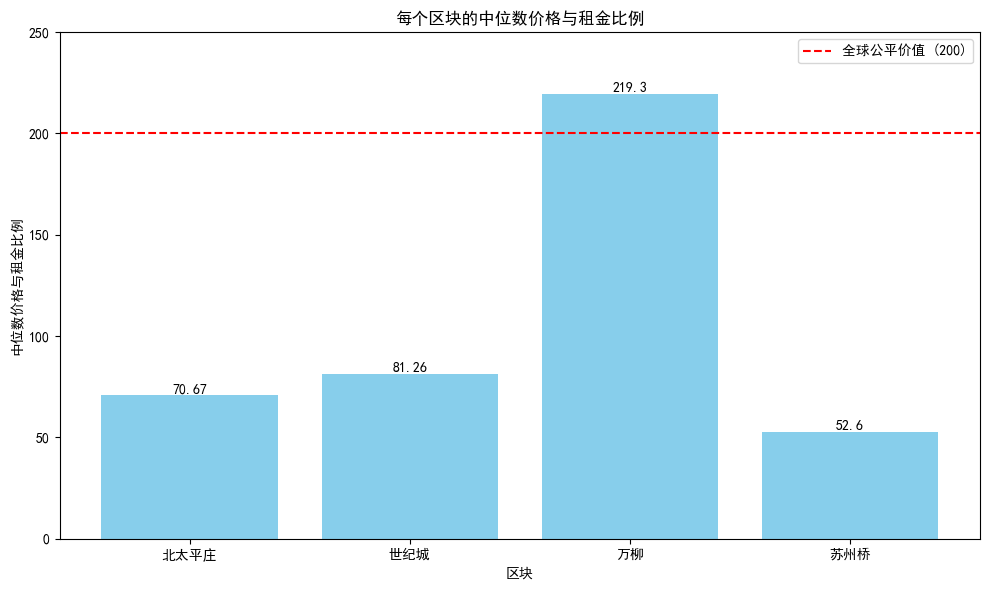

In [85]:
#本部分最后一part 画图
import matplotlib.pyplot as plt
import pandas as pd

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据准备
data = {
    'block': ['北太平庄', '世纪城', '万柳', '苏州桥'],  
    'median_price_to_rent_ratio': [70.67, 81.26, 219.30, 52.60]
}

df = pd.DataFrame(data)

# 绘制条形图
plt.figure(figsize=(10, 6))
bars = plt.bar(df['block'], df['median_price_to_rent_ratio'], color='skyblue')

# 添加数据标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

# 添加参考线
plt.axhline(y=200, color='r', linestyle='--', label='全球公平价值 (200)')

# 设置图表标题和轴标签
plt.title('每个区块的中位数价格与租金比例')
plt.xlabel('区块')
plt.ylabel('中位数价格与租金比例')

# 设置 y 轴范围
plt.ylim(0, 250)
plt.yticks(range(0, 251, 50))
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\86130\AppData\Local\Temp\ipykernel_26108\959616289.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['location'] = price_data['location'].map(location_mapping)
C:\Users\86130\AppData\Local\Temp\ipykernel_26108\959616289.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data['location'] = rent_data['location'].map(location_mapping)


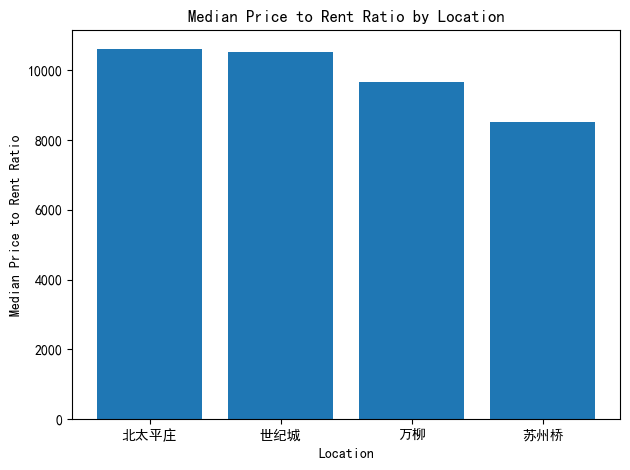

In [87]:
#FIGUREB
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 定义街区名称
locations = ['北太平庄', '世纪城', '万柳', '苏州桥']
data_list = []

# 读取每个街区的租房和二手房数据
for location in locations:
    # 读取租房和二手房数据
    rent_data = pd.read_csv(f'{location}租房.csv')  # 租房文件名
    price_data = pd.read_csv(f'{location}二手房.csv')  # 二手房文件名
    
    # 将街区名称添加为 location 列
    rent_data['location'] = location
    price_data['location'] = location

    # 在数据中标记类型
    rent_data['type'] = 'rent'
    price_data['type'] = 'price'
    
    # 将数据添加到列表中
    data_list.append(rent_data)
    data_list.append(price_data)

# 合并所有数据为一个 DataFrame
data = pd.concat(data_list, ignore_index=True)

# 处理二手房价格模型
price_data = data[data['type'] == 'price']
rent_data = data[data['type'] == 'rent']

# 创建街区名称映射字典
location_mapping = {
    '北太平庄': 1,
    '世纪城': 2,
    '万柳': 3,
    '苏州桥': 4
}

# 反向映射字典，将数字映射回汉字
reverse_location_mapping = {v: k for k, v in location_mapping.items()}

# 将 location 列中的街区名称转换为数字
price_data['location'] = price_data['location'].map(location_mapping)
rent_data['location'] = rent_data['location'].map(location_mapping)

# 确保没有 NaN 值
price_data = price_data.dropna(subset=['location'])
rent_data = rent_data.dropna(subset=['location'])

# 模型1：二手房价格
X_price = price_data[['面积（㎡）', 'location']]
Y_price = price_data['总价（万）'] / price_data['面积（㎡）']  # 每平方米价格

model1 = sm.OLS(Y_price, sm.add_constant(X_price)).fit()
price_data['predicted_price'] = model1.predict(sm.add_constant(X_price))

# 模型2：租金价格
X_rent = rent_data[['面积（㎡）', 'location']]
Y_rent = rent_data['租金（元/月）'] / rent_data['面积（㎡）']  # 每平方米租金

model2 = sm.OLS(Y_rent, sm.add_constant(X_rent)).fit()
rent_data['predicted_rent'] = model2.predict(sm.add_constant(X_rent))

# 合并预测结果
merged_data = pd.merge(price_data, rent_data, on=['面积（㎡）', 'location'])

# 计算价格与租金比率
merged_data['price_to_rent_ratio'] = merged_data['predicted_price'] *10000/ merged_data['predicted_rent']*12

# 按街区计算中位数价格与租金比率
median_ratio = merged_data.groupby('location')['price_to_rent_ratio'].median().reset_index()

# 将数字映射回街区名称
median_ratio['location'] = median_ratio['location'].map(reverse_location_mapping)

# 绘制条形图
# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.bar(median_ratio['location'], median_ratio['price_to_rent_ratio'])
plt.xlabel('Location')
plt.ylabel('Median Price to Rent Ratio')
plt.title('Median Price to Rent Ratio by Location')
plt.tight_layout()
plt.show()


C:\Users\86130\AppData\Local\Temp\ipykernel_26108\1285055825.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['location'] = price_data['location'].map(location_mapping)
C:\Users\86130\AppData\Local\Temp\ipykernel_26108\1285055825.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_data['location'] = rent_data['location'].map(location_mapping)


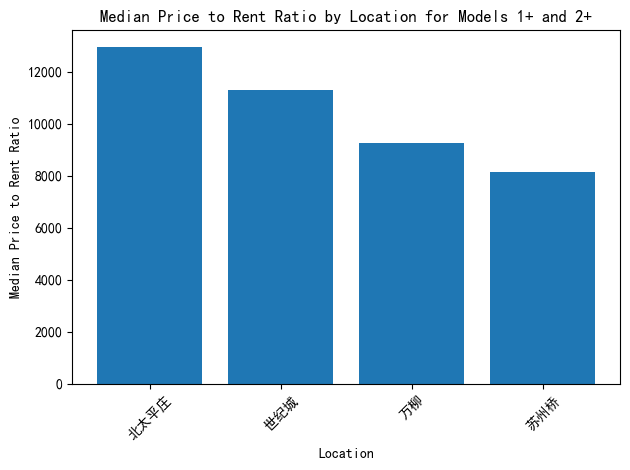

Model 1 R²: 0.3723554150879588
Model 1+ R²: 0.4477656953627428
Model 2 R²: 0.18371080849787225
Model 2+ R²: 0.2786158982633945


In [89]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# 定义街区名称
locations = ['北太平庄', '世纪城', '万柳', '苏州桥']
data_list = []

# 读取每个街区的租房和二手房数据
for location in locations:
    rent_data = pd.read_csv(f'{location}租房.csv')  # 租房文件名
    price_data = pd.read_csv(f'{location}二手房.csv')  # 二手房文件名
    
    rent_data['location'] = location
    price_data['location'] = location
    rent_data['type'] = 'rent'
    price_data['type'] = 'price'
    
    data_list.append(rent_data)
    data_list.append(price_data)

# 合并所有数据为一个 DataFrame
data = pd.concat(data_list, ignore_index=True)

# 处理二手房价格模型
price_data = data[data['type'] == 'price']
rent_data = data[data['type'] == 'rent']

location_mapping = {'北太平庄': 1, '世纪城': 2, '万柳': 3, '苏州桥': 4}
price_data['location'] = price_data['location'].map(location_mapping)
rent_data['location'] = rent_data['location'].map(location_mapping)

# 确保没有 NaN 值
price_data = price_data.dropna(subset=['location'])
rent_data = rent_data.dropna(subset=['location'])

# 添加非线性特征（面积的平方项）
price_data['面积平方'] = price_data['面积（㎡）'] ** 2
rent_data['面积平方'] = rent_data['面积（㎡）'] ** 2

# 添加交互项
price_data['面积_location'] = price_data['面积（㎡）'] * price_data['location']
rent_data['面积_location'] = rent_data['面积（㎡）'] * rent_data['location']

# 模型1：二手房价格 (Model 1)
X_price_model1 = price_data[['面积（㎡）', 'location']]
Y_price_model1 = price_data['总价（万）'] / price_data['面积（㎡）']

model1 = sm.OLS(Y_price_model1, sm.add_constant(X_price_model1)).fit()

# 模型1+：添加非线性与交互项 (Model 1+)
X_price_model1_plus = price_data[['面积（㎡）', '面积平方', 'location', '面积_location']]
model1_plus = sm.OLS(Y_price_model1, sm.add_constant(X_price_model1_plus)).fit()

# 模型2：租金价格 (Model 2)
X_rent_model2 = rent_data[['面积（㎡）', 'location']]
Y_rent_model2 = rent_data['租金（元/月）'] / rent_data['面积（㎡）']

model2 = sm.OLS(Y_rent_model2, sm.add_constant(X_rent_model2)).fit()

# 模型2+：添加非线性与交互项 (Model 2+)
X_rent_model2_plus = rent_data[['面积（㎡）', '面积平方', 'location', '面积_location']]
model2_plus = sm.OLS(Y_rent_model2, sm.add_constant(X_rent_model2_plus)).fit()

# 预测结果
price_data['predicted_price'] = model1_plus.predict(sm.add_constant(X_price_model1_plus))
rent_data['predicted_rent'] = model2_plus.predict(sm.add_constant(X_rent_model2_plus))

# 合并预测结果
merged_data = pd.merge(price_data, rent_data, on=['面积（㎡）', 'location'])

# 计算价格与租金比率
merged_data['price_to_rent_ratio'] = merged_data['predicted_price'] *10000/ merged_data['predicted_rent']*12

# 按街区计算中位数价格与租金比率
median_ratio = merged_data.groupby('location')['price_to_rent_ratio'].median().reset_index()

# 将数字映射回街区名称
median_ratio['location'] = median_ratio['location'].map(reverse_location_mapping)

# 绘制条形图
plt.bar(median_ratio['location'], median_ratio['price_to_rent_ratio'])
plt.xlabel('Location')
plt.ylabel('Median Price to Rent Ratio')
plt.title('Median Price to Rent Ratio by Location for Models 1+ and 2+')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 输出 R² 值
print(f"Model 1 R²: {model1.rsquared}")
print(f"Model 1+ R²: {model1_plus.rsquared}")
print(f"Model 2 R²: {model2.rsquared}")
print(f"Model 2+ R²: {model2_plus.rsquared}")


改进后的明显比改进前的好，我更信任改进后的